# THE FIFA WORLD CUP

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline

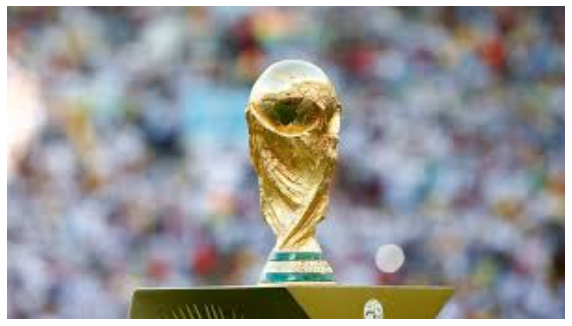

In [3]:
plt.figure(figsize=(10,10))
img=np.array(Image.open(r"download.jpg"))
plt.imshow(img,interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
matches  = pd.read_csv(r"WorldCupMatches.csv")
players  = pd.read_csv(r"WorldCupPlayers.csv")
cups     = pd.read_csv(r"WorldCups.csv")

In [5]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [7]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [8]:
nulls=players.isnull().sum()
nulls

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [9]:
nulls_percentage = nulls[nulls!=0]/players.shape[0]*100
print('the percentages of null values per feature:\n')
print(round(nulls_percentage,2))

the percentages of null values per feature:

Position    89.04
Event       76.00
dtype: float64


In [10]:
# As they are very large in percentage so it is better to drop them.

In [11]:
players.drop(columns=['Event'],inplace=True)

In [12]:
players

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN
...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN


In [13]:
cups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [14]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [15]:
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [16]:
matches = matches[matches["Year"].notnull()]

In [17]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


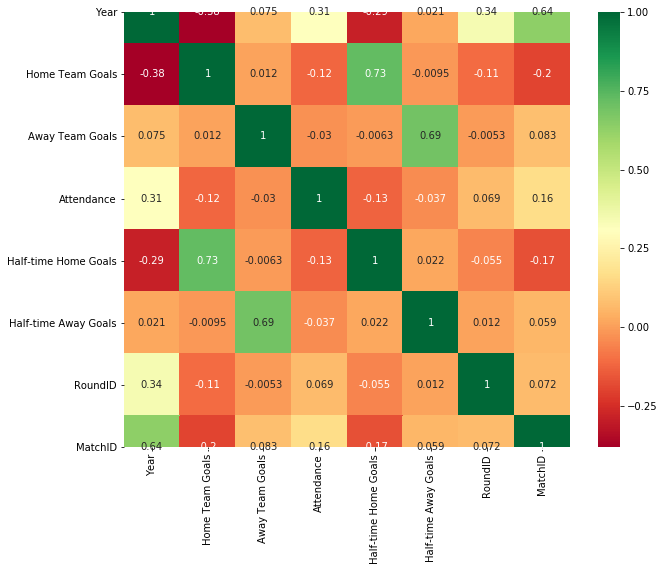

In [18]:
corrmat = matches.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8)),
#plot heat map
g=sns.heatmap(matches[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
group=matches.groupby('Year')["Attendance"].sum().reset_index()
# group

In [20]:
group['Year']=group['Year'].astype(int)

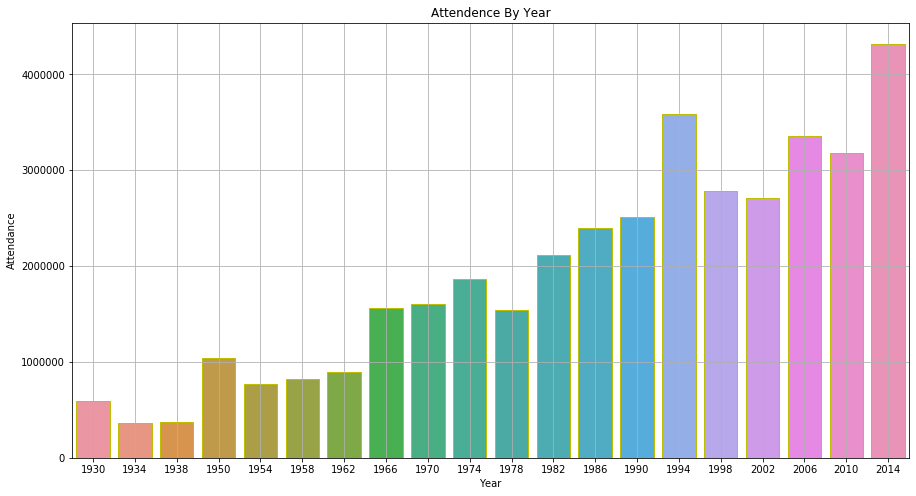

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(group["Year"],group["Attendance"],linewidth=1,edgecolor="y"*len(group['Attendance']))
plt.title("Attendence By Year")
plt.grid(True)
plt.show()

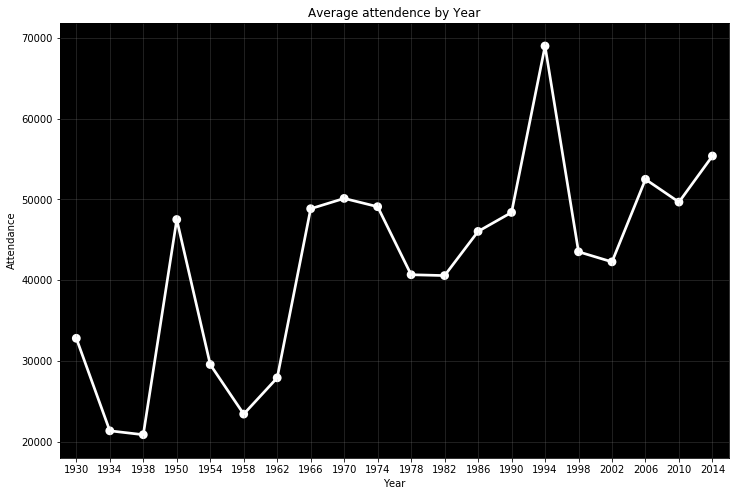

In [22]:
group1 = matches.groupby("Year")["Attendance"].mean().reset_index()
group1["Year"] = group1["Year"].astype(int)
plt.figure(figsize=(12,8))
ax = sns.pointplot(group1["Year"],group1["Attendance"],color="w")
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.3)
plt.title("Average attendence by Year")
plt.show()

In [23]:
group2 = matches.sort_values(by="Attendance",ascending=False)[:15]

In [24]:
group2['Datetime']=group2['Datetime'].str.split("-").str[0]
#group2

In [25]:
group2['matchvs']=group2['Home Team Name']+ " vs " +group2['Away Team Name']
#group2

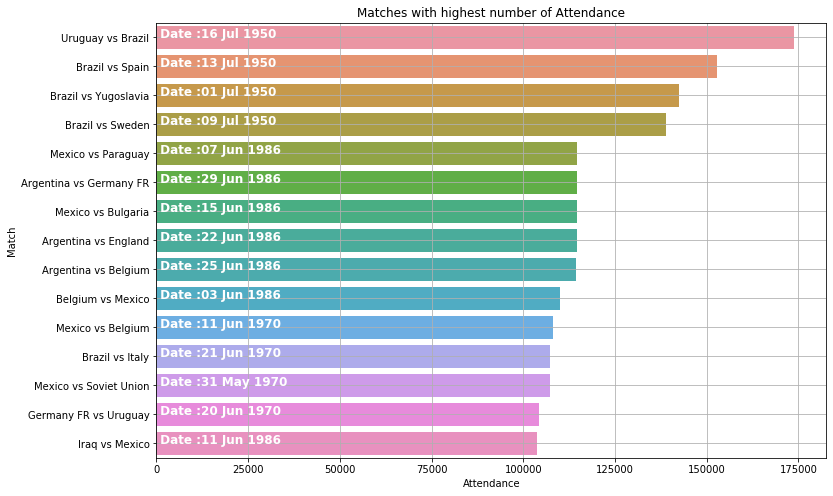

In [26]:
plt.figure(figsize=(12,8))
ax = sns.barplot(y =group2["matchvs"],x = group2["Attendance"],linewidth = 1)         
plt.xlabel("Attendance")
plt.ylabel("Match")
plt.title("Matches with highest number of Attendance")
plt.grid(True)
for i,j in enumerate(" Date :" + group2["Datetime"]):
    ax.text(.4,i,j,fontsize = 12,color="white",weight = "bold")

In [27]:
group3=matches.groupby(["Stadium","City"])["Attendance"].mean().reset_index().sort_values(by="Attendance",ascending=False)[0:15]
# group3


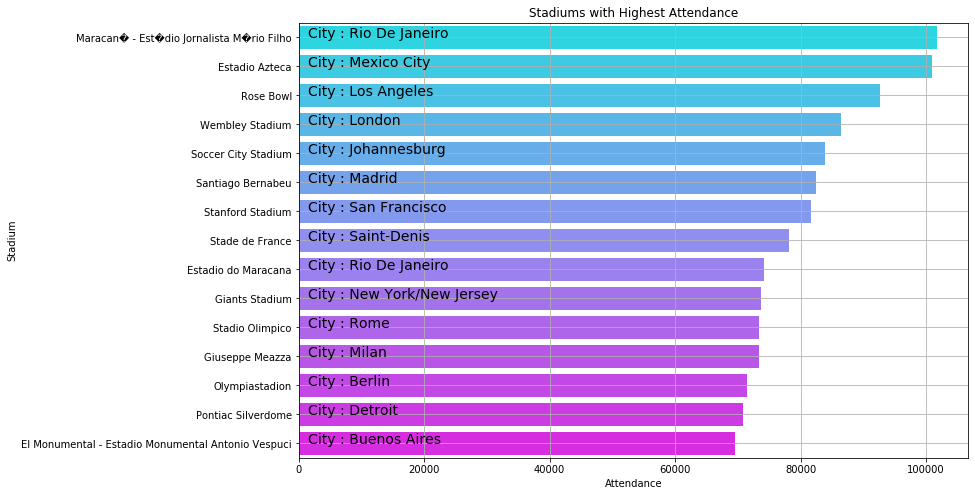

In [28]:
plt.figure(figsize=(12,8))
ax = sns.barplot(y = group3["Stadium"],x = group3["Attendance"],palette="cool")
plt.grid(True)

for i,j in enumerate("  City : " + group3["City"]):
    ax.text(.5,i,j,fontsize=14)
plt.xlabel("Attendance")
plt.ylabel("Stadium")
plt.title("Stadiums with Highest Attendance")
plt.show()

In [29]:
mc=matches["City"].value_counts().reset_index()
mc[0:20]

,index,City
0,Mexico City,23
1,Rio De Janeiro,18
2,Montevideo,18
3,Guadalajara,17
4,Johannesburg,15
5,Sao Paulo,14
6,Buenos Aires,12
7,Belo Horizonte,11
8,Munich,11
9,Leon,11


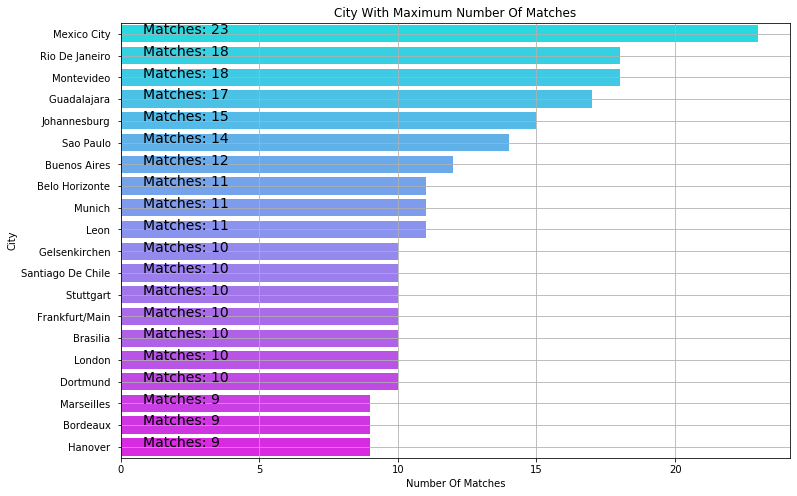

In [30]:
plt.figure(figsize=(12,8))
ax = sns.barplot(y = mc["index"][:20],x = mc["City"][:20],palette="cool")
plt.grid(True)

for i,j in enumerate("  Matches: " + mc["City"][:20].astype(str)):
    ax.text(.5,i,j,fontsize=14)
plt.xlabel("Number Of Matches")
plt.ylabel("City")
plt.title("City With Maximum Number Of Matches")
plt.show()


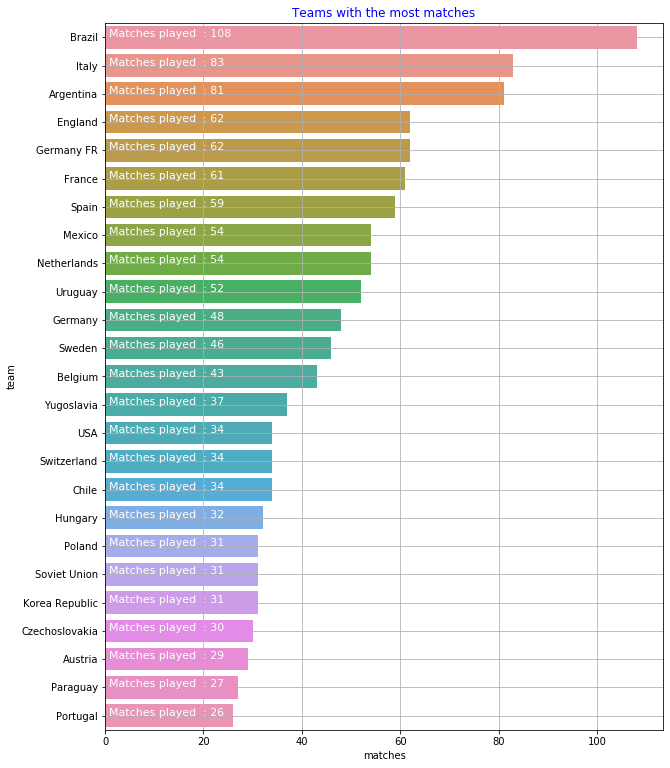

In [31]:
ht = matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)
# print(mt)
plt.figure(figsize=(10,13))
ax = sns.barplot("matches","team",data=mt[:25])
plt.grid(True)
plt.title("Teams with the most matches",color='b')
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=11,color="white")

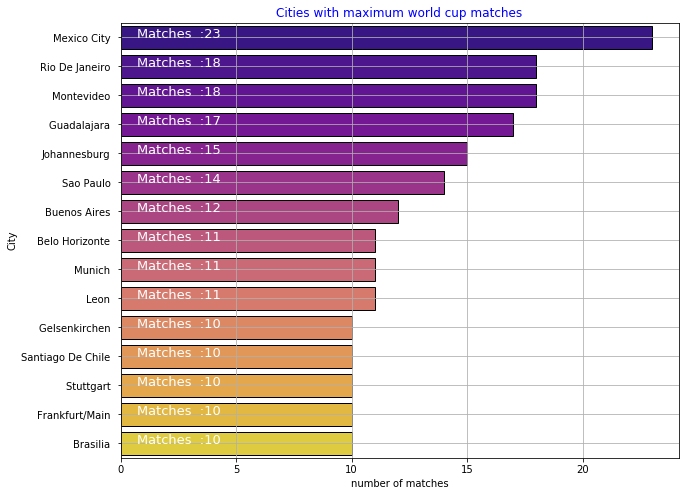

In [32]:
mat_c = matches["City"].value_counts().reset_index()
plt.figure(figsize=(10,8))
ax = sns.barplot(y=mat_c["index"][:15],x = mat_c["City"][:15],palette="plasma",
                 linewidth=1,edgecolor="k"*15)
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches",color='b')

for i,j in enumerate("Matches  :" + mat_c["City"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 13,color="w")
plt.show()

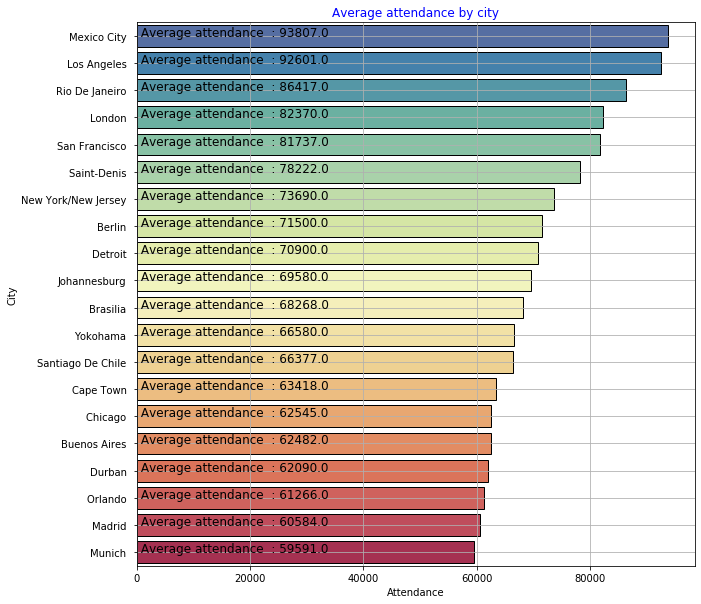

In [33]:
ct_at = matches.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance",ascending=False)
ct_at

plt.figure(figsize=(10,10))

ax = sns.barplot("Attendance","City",
            data=ct_at[:20],
            linewidth = 1,
            edgecolor = "k"*20,
            palette  = "Spectral_r")

for i,j in enumerate(" Average attendance  : "+np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(.7,i,j,fontsize=12)
plt.grid(True)

plt.title("Average attendance by city",color='b')
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


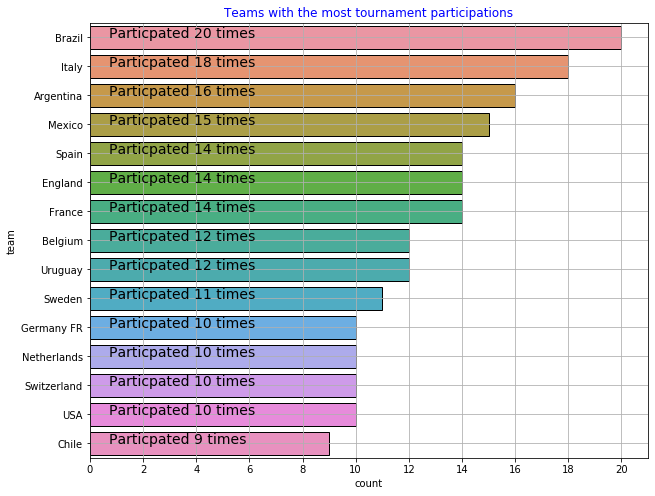

In [35]:
hy = matches[["Year","Home Team Name"]]
hy.columns = ["year","team"]
hy["type"] = "HOME TEAM"
ay = matches[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15],
                 linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=14,color="k")
plt.grid(True)
    
plt.title("Teams with the most tournament participations",color='b')
plt.ylabel("team")
plt.xlabel("count")
plt.xticks(np.arange(0,22,2))
plt.show()

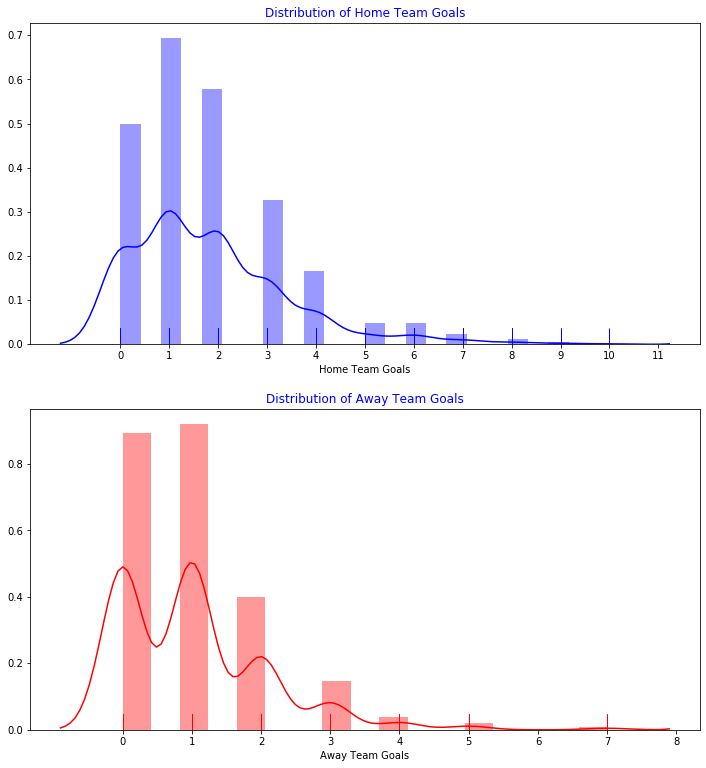

In [36]:
plt.figure(figsize=(12,13))
plt.subplot(211)
sns.distplot(matches["Home Team Goals"],color="b",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Goals",color='b')


plt.subplot(212)
sns.distplot(matches["Away Team Goals"],color="r",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Goals",color='b')
plt.show()
